<a href="https://colab.research.google.com/github/Eric-Mendes/treinadores-serie-a/blob/main/treinadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyvis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Eric-Mendes/treinadores-serie-a/main/data/treinadores.csv')
df = df[df['TIME'].isin(list(filter(lambda x: x[0] == ' ', df['TIME'])))]

In [4]:
df['TIME'] = list(map(lambda x: x[1: ], df['TIME']))
df.drop_duplicates(inplace=True)

In [5]:
df = df[df['TIME'].isin(list(filter(lambda x: x[-2:] != ' B', df['TIME'])))]

In [6]:
df = df[df['TIME'].isin(list(filter(lambda x: x[-1] not in ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'), df['TIME'])))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


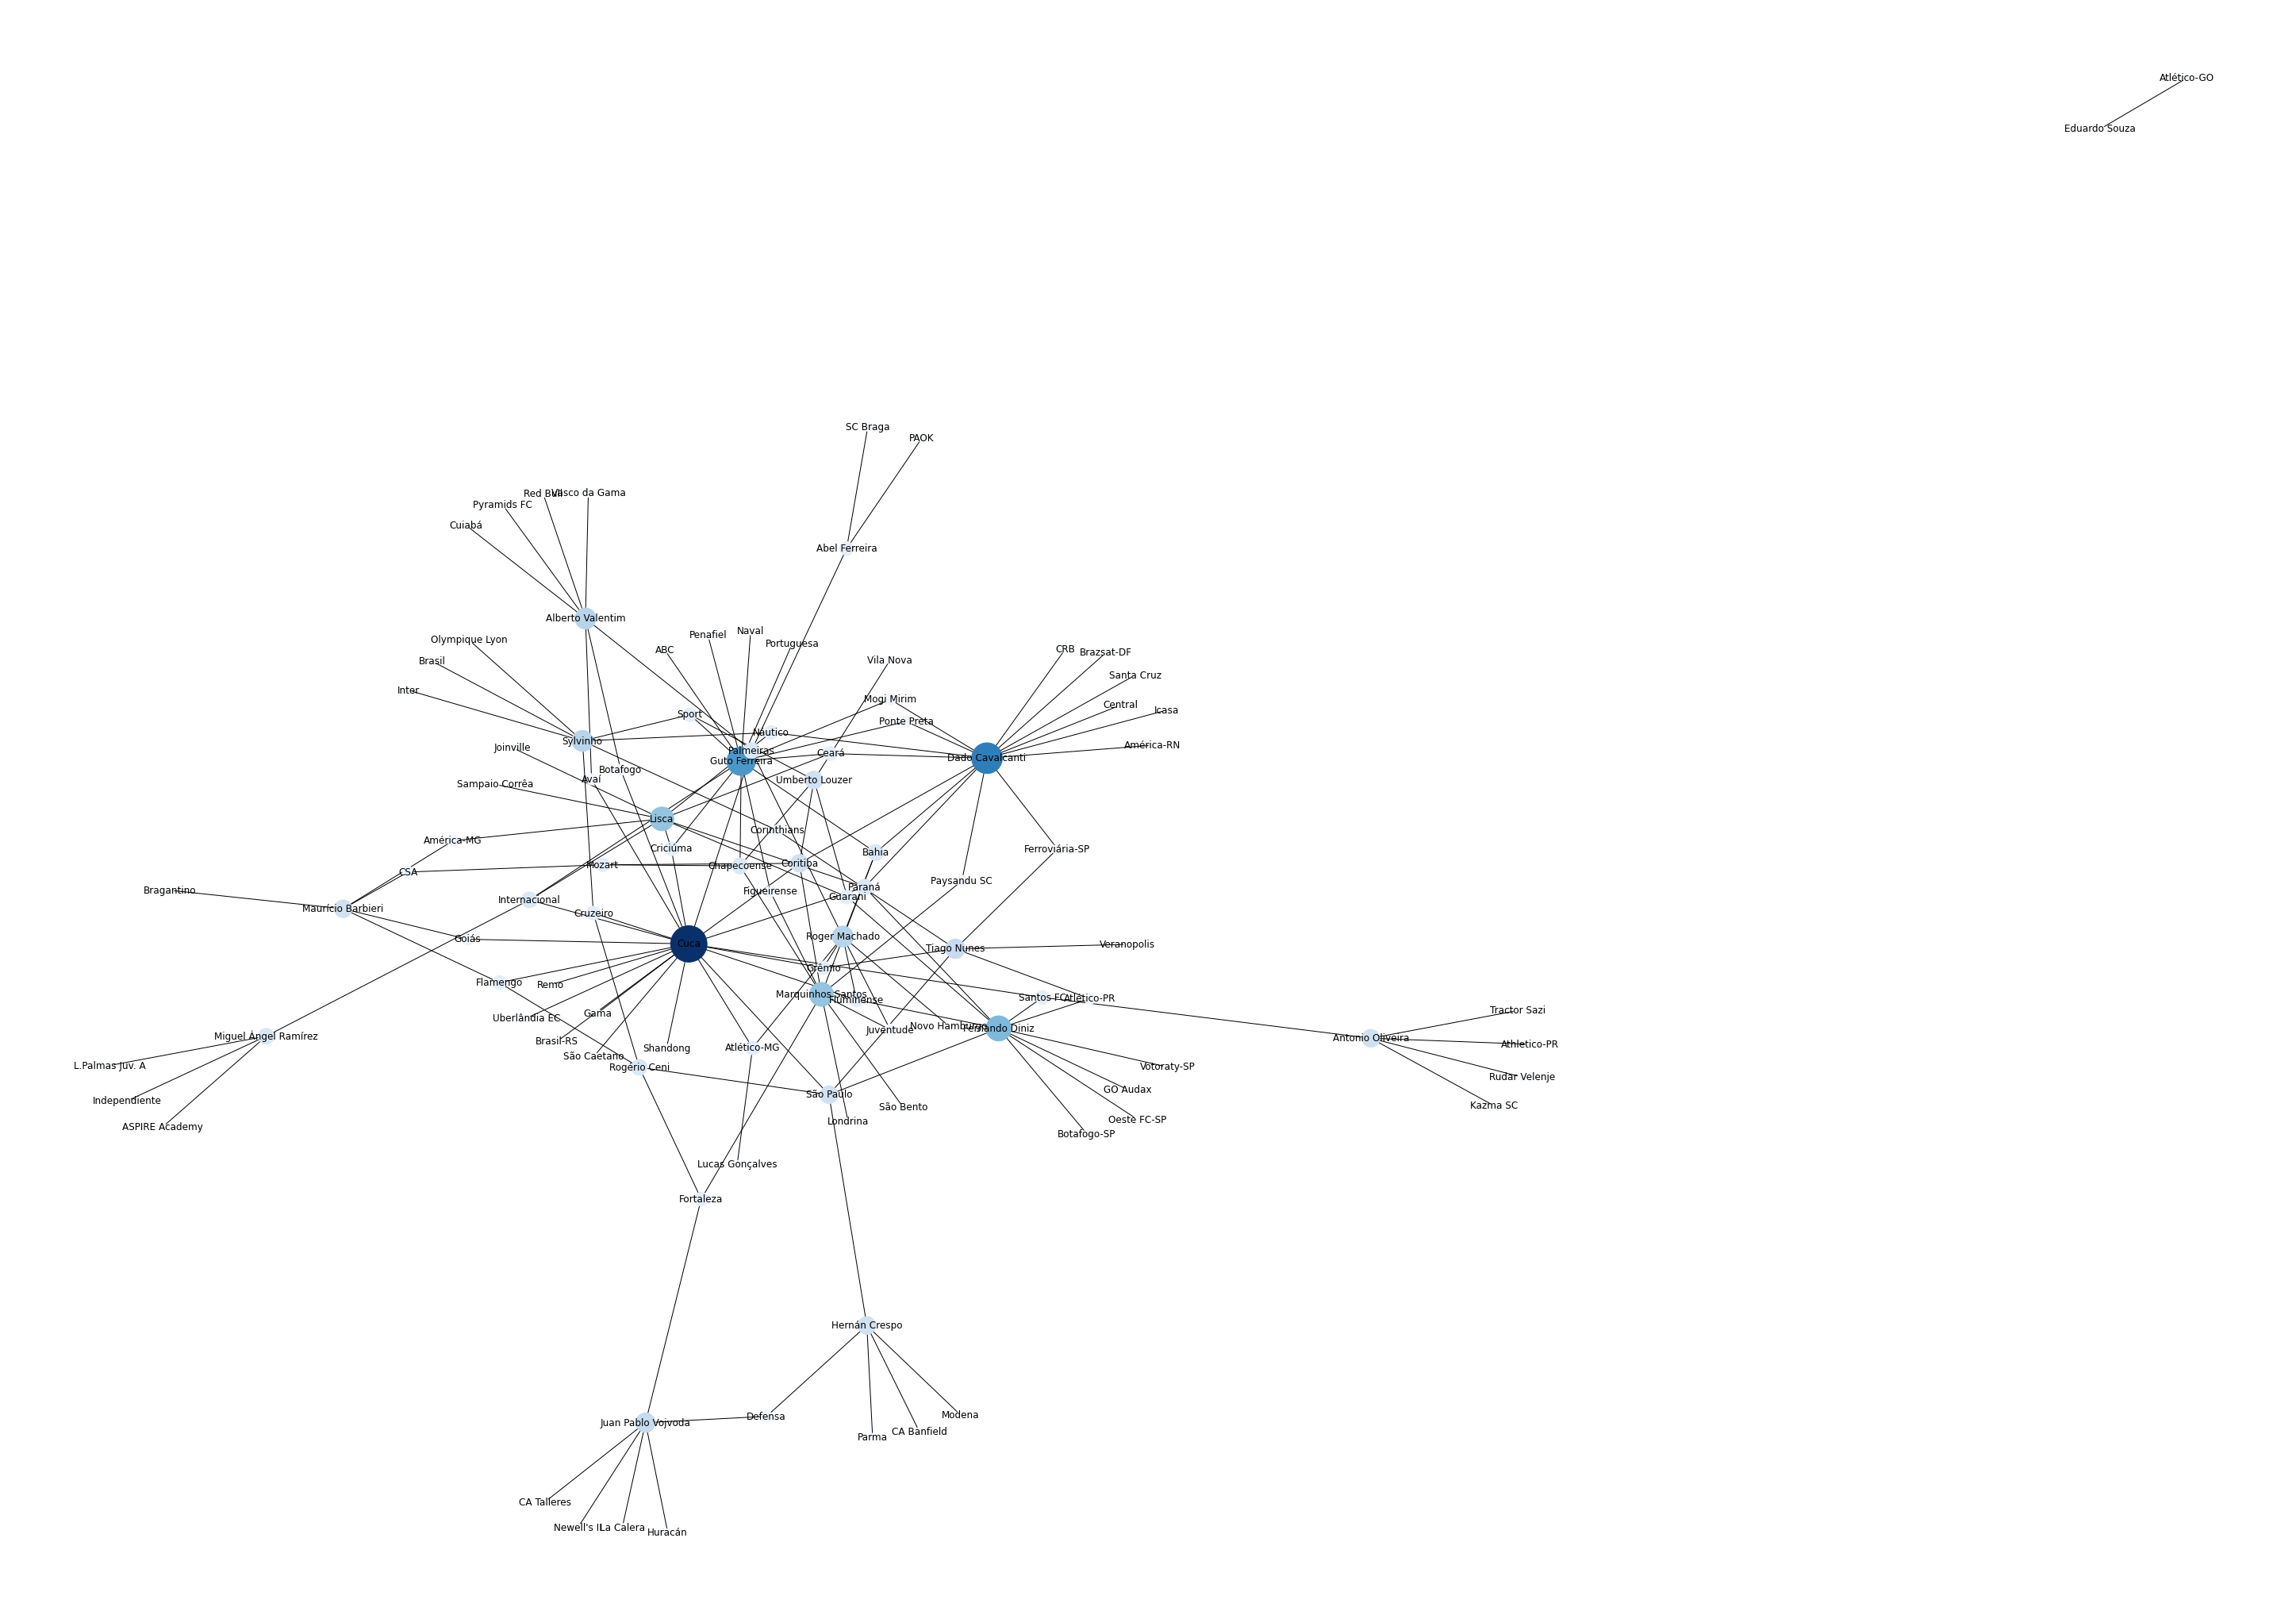

In [26]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

plt.figure(figsize =(10*4, 7*4))

G = nx.Graph()

for _, row in df.iterrows():
  G.add_edge(row['TREINADOR'], row['TIME'])
  
node_color = [G.degree(v) for v in G]
node_size = [100 * G.degree(v) for v in G]

nx.draw_spring(G, with_labels=True, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues)
plt.axis('off')
plt.tight_layout()